In [20]:
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


import lightgbm as lgb
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
#Import data: Boston
from sklearn.datasets import load_boston
boston = load_boston()
X_boston,y_boston = boston.data, boston.target # Create X matrix and y vector from the dataset.
print('Shape of data: {} {}'.format(X_boston.shape, y_boston.shape))

Shape of data: (506, 13) (506,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size = 0.3, random_state = 13)

In [15]:
#LinearRegression
regr_boston = LinearRegression()  # Create the Linear Regression estimator
regr_boston.fit(X_train, y_train) # Perform the fitting

# Compute Score for training and testing sets 
# Best possible score is 1.0, lower values are worse.
print('Training Score: {}'.format(regr_boston.score(X_train, y_train)))
print('Testing Score: {}'.format(regr_boston.score(X_test, y_test)))

Training Score: 0.7424195044164144
Testing Score: 0.7149587817316649


In [16]:
#DecissionTree Regressor
dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train, y_train)
acc_dt_reg = dtree_reg.score(X_test, y_test)
print(acc_dt_reg)

0.7563211226726498


In [17]:
n_trees = 1000
lr = 0.05
rs = 101


rfr = RandomForestRegressor(n_estimators=n_trees, random_state=rs, n_jobs=-1)
rfr.fit(X_train, y_train)
acc_rf_reg = rfr.score(X_test, y_test)
print(acc_rf_reg)

0.8610158537363508


In [18]:
#feature scores
# Score using a single feature
regr_feat1 = LinearRegression()
for i in np.arange(13):
    feat1=X_train[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print('Feature: {}'.format(boston.feature_names[i]))
    print('Score: {}'.format(regr_feat1.score(feat1, y_train)))
    

Feature: CRIM
Score: 0.13263509444229993
Feature: ZN
Score: 0.15138073388398832
Feature: INDUS
Score: 0.2458193847081357
Feature: CHAS
Score: 0.04881246595982469
Feature: NOX
Score: 0.18827599410893325
Feature: RM
Score: 0.4713593967110641
Feature: AGE
Score: 0.16397469521929464
Feature: DIS
Score: 0.06392439652294968
Feature: RAD
Score: 0.12220462768495777
Feature: TAX
Score: 0.209481438745877
Feature: PTRATIO
Score: 0.2415770473552209
Feature: B
Score: 0.09796368528419896
Feature: LSTAT
Score: 0.5431705891047645


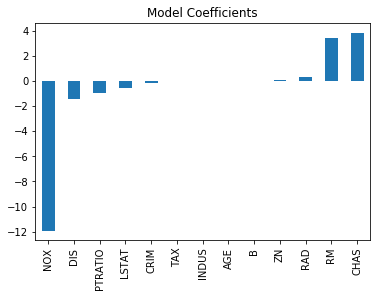

In [21]:
# Plotting model coefficients:
coef = Series(regr_boston.coef_, boston.feature_names).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

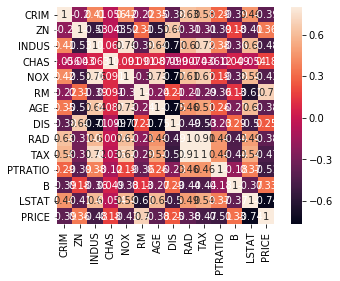

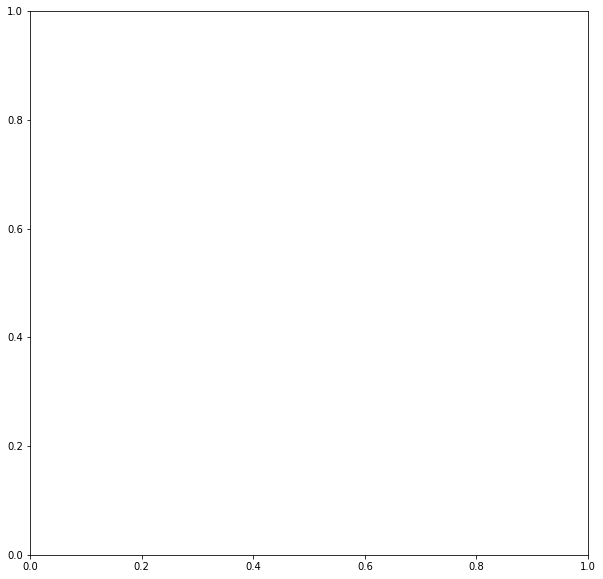

In [32]:
df_boston2 = pd.DataFrame(boston.data[:,:], columns=boston.feature_names[:])
df_boston2['PRICE'] = boston.target
corrmat = df_boston2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)
fig, ax = plt.subplots(figsize=(10,10)) 